# DATA ANALYSIS PRESENTATION REMINDER

Before starting a dataset, you must understand it to be able to tell interesting stories with it, and not to tell wrong things

- Who is the provider of the dataset ?
- How data has been collected
- Does the dataset represent full population ? Just a sample ? if it's a subset, what are the selection criterias ?
- What each line is representing ? 

When you are presenting your results, most of the time, you must use non technical language. 


# TD3 : FIRSTNAME STUDY PART 2 : DIVERSITY

In [2]:
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

# REMARQUEZ BIEN LE FORMAT DU CHEMIN DE FICHIER 
# Dossier qui commence par / = chemin absolu,c-a-d en partant de la racine du disque
# Dossier qui ne commence pas par / = chemin relatif , c-a-d qui commence dans le répértoire courant.

prenoms= pd.read_csv("datasets/dpt2018.csv",sep=";")
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [5]:
top20=prenoms.groupby("preusuel").nombre.sum().sort_values()[-20:]
top20

preusuel
DOMINIQUE          409919
PAUL               416412
ROBERT             419297
ROGER              423873
DANIEL             435021
MARCEL             467850
CLAUDE             468445
BERNARD            469399
JACQUES            482812
ALAIN              506899
RENÉ               516739
LOUIS              517774
PHILIPPE           538661
JEANNE             556074
ANDRÉ              712568
MICHEL             820459
PIERRE             891894
_PRENOMS_RARES    1575032
JEAN              1917129
MARIE             2260236
Name: nombre, dtype: int64

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:ylabel='preusuel'>

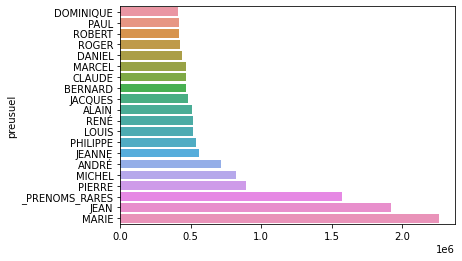

In [6]:
import seaborn as sns
sns.barplot(y=top20.index, x=top20.values)

<AxesSubplot:ylabel='dpt'>

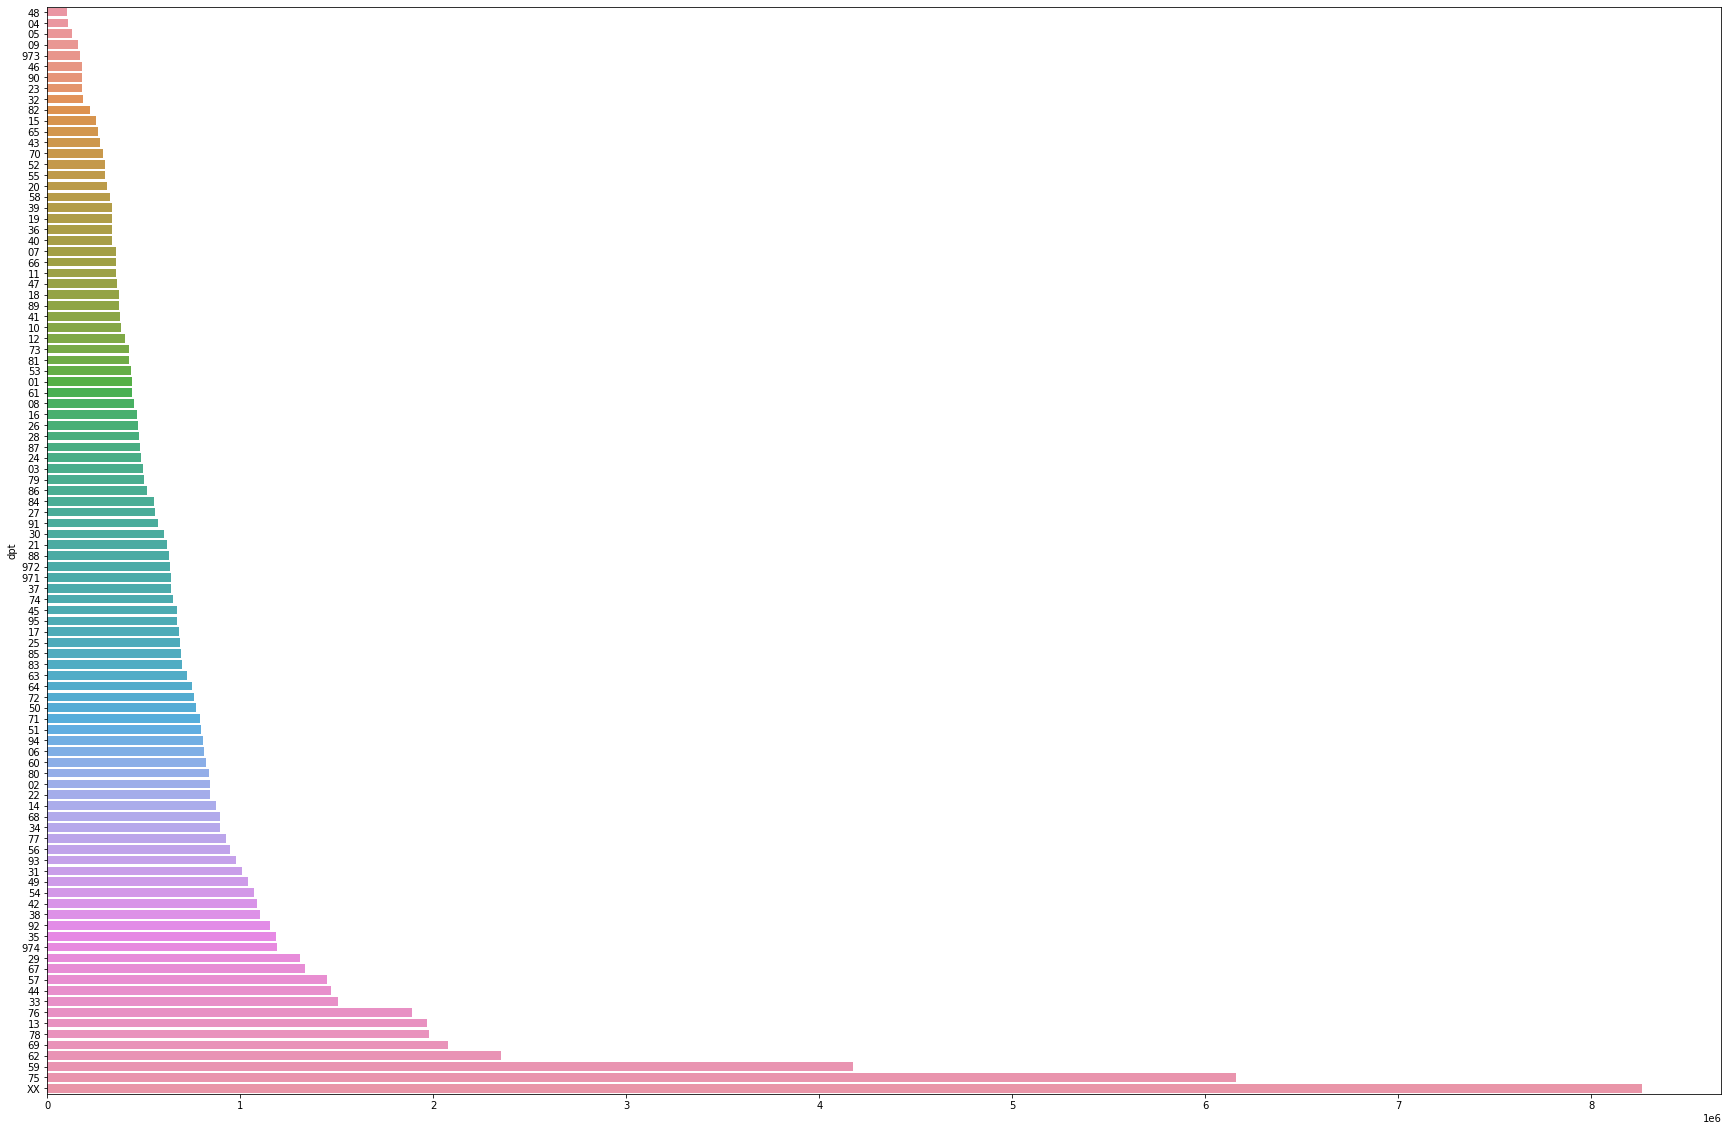

In [15]:
topdep=prenoms.groupby("dpt").nombre.sum().sort_values()
plt.figure(figsize=(30,20))
sns.barplot(y=topdep.index, x=topdep.values)

## Creating columns, mapping data using dicts ( // SQL JOIN) , map, replace

We want to add a column in our DataFrame, containing the departments names.
We need to find a dataset containing the departement name for each department number.
This file exists on the INSEE Website, let's download it :
https://www.insee.fr/fr/information/3720946
https://www.insee.fr/fr/statistiques/fichier/3720946/departement2019-csv.zip

In [16]:
dep=pd.read_csv("datasets/departement2020_insee.csv",sep=",")
dep


,dep,reg,cheflieu,tncc,ncc,nccenr,libelle
0,01,84,01053,5,AIN,Ain,Ain
1,02,32,02408,5,AISNE,Aisne,Aisne
2,03,84,03190,5,ALLIER,Allier,Allier
3,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes
...,...,...,...,...,...,...,...
96,971,1,97105,3,GUADELOUPE,Guadeloupe,Guadeloupe
97,972,2,97209,3,MARTINIQUE,Martinique,Martinique
98,973,3,97302,3,GUYANE,Guyane,Guyane
99,974,4,97411,0,LA REUNION,La Réunion,La Réunion


In [17]:
# Sanity check : let's verify number of departements before doing mapping,
# to see if it correspond to the nb of distinct departements number in our dataset


# Number of unique values in a  column 
# Equivalent to SQL Select count ( distinct )
prenoms['dpt'].nunique()

# AND NOT prenoms['dpt'].value_counts()
# Equivalent to SQL groupy count ( counts of unique values for each dpt)


100

### We Create a dict from the dataframe

In [19]:
# Fonctions dict et zip qui permettent d'asosocier les deux colonnes du tableau pour obtenir un dictionnaire.
depdict=dict(zip(dep.dep,dep.libelle))
depdict

{'01': 'Ain',
 '02': 'Aisne',
 '03': 'Allier',
 '04': 'Alpes-de-Haute-Provence',
 '05': 'Hautes-Alpes',
 '06': 'Alpes-Maritimes',
 '07': 'Ardèche',
 '08': 'Ardennes',
 '09': 'Ariège',
 '10': 'Aube',
 '11': 'Aude',
 '12': 'Aveyron',
 '13': 'Bouches-du-Rhône',
 '14': 'Calvados',
 '15': 'Cantal',
 '16': 'Charente',
 '17': 'Charente-Maritime',
 '18': 'Cher',
 '19': 'Corrèze',
 '21': "Côte-d'Or",
 '22': "Côtes-d'Armor",
 '23': 'Creuse',
 '24': 'Dordogne',
 '25': 'Doubs',
 '26': 'Drôme',
 '27': 'Eure',
 '28': 'Eure-et-Loir',
 '29': 'Finistère',
 '2A': 'Corse-du-Sud',
 '2B': 'Haute-Corse',
 '30': 'Gard',
 '31': 'Haute-Garonne',
 '32': 'Gers',
 '33': 'Gironde',
 '34': 'Hérault',
 '35': 'Ille-et-Vilaine',
 '36': 'Indre',
 '37': 'Indre-et-Loire',
 '38': 'Isère',
 '39': 'Jura',
 '40': 'Landes',
 '41': 'Loir-et-Cher',
 '42': 'Loire',
 '43': 'Haute-Loire',
 '44': 'Loire-Atlantique',
 '45': 'Loiret',
 '46': 'Lot',
 '47': 'Lot-et-Garonne',
 '48': 'Lozère',
 '49': 'Maine-et-Loire',
 '50': 'Manche',
 '

In [20]:
# To do the mapping, ( replace every value with the corresponding value from the dict) we use replace
# replace only replace the value if the key exists in the dict.
# If the key does not exists, it doesn't modify the cell.
prenoms['dpt'].replace(depdict)

0                      XX
1                      XX
2                      XX
3                Vaucluse
4          Hauts-de-Seine
                ...      
3624989             Rhône
3624990                XX
3624991                XX
3624992                XX
3624993                XX
Name: dpt, Length: 3624994, dtype: object

In [22]:
# WHAT IF IF WANT TO SHOW MORE LINE THAN THE DEFAULT 10 ?
pd.set_option('max_rows',100)
pd.set_option('min_rows',100)

prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
5,1,AADIL,XXXX,XX,175
6,1,AAHIL,2016,95,3
7,1,AAHIL,XXXX,XX,17
8,1,AAKASH,XXXX,XX,26
9,1,AARON,1962,75,3


In [56]:
# We Create the new column with the output of the mapping
prenoms['nomdep']=prenoms['dpt'].replace(depdict)

In [57]:
prenoms

,sexe,preusuel,annais,dpt,nombre,nomdep
0,1,A,XXXX,XX,27,XX
1,1,AADAM,XXXX,XX,27,XX
2,1,AADEL,XXXX,XX,55,XX
3,1,AADIL,1983,84,3,Vaucluse
4,1,AADIL,1992,92,3,Hauts-de-Seine
5,1,AADIL,XXXX,XX,175,XX
6,1,AAHIL,2016,95,3,Val-d'Oise
7,1,AAHIL,XXXX,XX,17,XX
8,1,AAKASH,XXXX,XX,26,XX
9,1,AARON,1962,75,3,Paris


In [25]:
# LET'S DO ANOTHER MAPPING, BUT THIS TIME USING A LAMBDA FUNCTION
# we want to add a new column, with H for boys and F for girls
# We use the MAP funnction
prenoms['genre']=prenoms['sexe'].map(lambda x: "H" if x==1 else "F")
prenoms

,sexe,preusuel,annais,dpt,nombre,genre
0,1,A,XXXX,XX,27,H
1,1,AADAM,XXXX,XX,27,H
2,1,AADEL,XXXX,XX,55,H
3,1,AADIL,1983,84,3,H
4,1,AADIL,1992,92,3,H
5,1,AADIL,XXXX,XX,175,H
6,1,AAHIL,2016,95,3,H
7,1,AAHIL,XXXX,XX,17,H
8,1,AAKASH,XXXX,XX,26,H
9,1,AARON,1962,75,3,H


Dot Notation vs Bracket notation ?
https://www.dataschool.io/pandas-dot-notation-vs-brackets/

( path of least resistance ) 

Retirer Accents ?

## Firstname diversity study


### Download the National Firstname file

To study evolution of diversity, we will now work on national evolution over the period, we don't need the departments anymore.

Let's download the national file here :

https://www.insee.fr/fr/statistiques/fichier/2540004/nat2018_csv.zip

In [30]:
nat= pd.read_csv("datasets/nat2018.csv",sep=";")
nat

,sexe,preusuel,annais,nombre
0,1,A,1980,3
1,1,A,1998,3
2,1,A,XXXX,21
3,1,AADAM,2009,4
4,1,AADAM,2014,3
5,1,AADAM,2016,4
6,1,AADAM,2017,4
7,1,AADAM,2018,3
8,1,AADAM,XXXX,9
9,1,AADEL,1976,5


In [31]:
# FIRST LET'S REMOVE LINES WITH annais=="XXXX"
nat=nat[nat.annais!="XXXX"]
nat

,sexe,preusuel,annais,nombre
0,1,A,1980,3
1,1,A,1998,3
3,1,AADAM,2009,4
4,1,AADAM,2014,3
5,1,AADAM,2016,4
6,1,AADAM,2017,4
7,1,AADAM,2018,3
9,1,AADEL,1976,5
10,1,AADEL,1978,3
11,1,AADEL,1980,3



### Groupby - Apply  : inserting a new column with the ouput of a function

![Groupby - apply - combine](Groupby-Apply-Combine.jpeg)

In [32]:
# LET's INSERT A COLUMN with the proportion of babies given each name relative to the total number of births for each year and sex
# A proportion of 0.02 for JEAN in 1900 would indicate that 2% of all baby boys in 1900 were given the firstname JEAN

# For this we need first to do a groupby year and sex, then to apply a function to compute the proportion on every line for each group
# then to combine all the lines outputted by the function.

def add_prop(group):
    group['prop'] = group.nombre / group.nombre.sum()
    return group

nat=nat.groupby(['annais','sexe']).apply(add_prop)


In [ ]:
nat.sort_values(by="prop")

we grouped by annais and sexe, but in the result we have the same number of line than the full dataframe : 601461

Please observe the difference between groupby/sum, and groupby/apply using the custom function.
- Groupby-Sum would return ONLY ONE ROW per group
- Groupby-top returned all the rows for each group

APPLIED FUNCTION "add_prop" HAS BEEN CALLED ONCE FOR EACH GROUP, but instead of just returning one line by group, like the groupby-sum feature, it outputted all lines. For each group, a "prop" column have been added with the result for each line of number of births for this firstname / sum of births in this group. 

The form of the results DEPENDS ON THE APPLIED FUNCTION

### Sanity Checks - how to verify that our calculations make sense ?

In [64]:
# SANITY CHECK 1
# Let's first verify that sum of proportions in every year/sex combination equals 1.0
nat.groupby(['annais','sexe']).prop.sum()

annais  sexe
1900    1       1.0
        2       1.0
1901    1       1.0
        2       1.0
1902    1       1.0
        2       1.0
1903    1       1.0
        2       1.0
1904    1       1.0
        2       1.0
1905    1       1.0
        2       1.0
1906    1       1.0
        2       1.0
1907    1       1.0
        2       1.0
1908    1       1.0
        2       1.0
1909    1       1.0
        2       1.0
1910    1       1.0
        2       1.0
1911    1       1.0
        2       1.0
1912    1       1.0
        2       1.0
1913    1       1.0
        2       1.0
1914    1       1.0
        2       1.0
1915    1       1.0
        2       1.0
1916    1       1.0
        2       1.0
1917    1       1.0
        2       1.0
1918    1       1.0
        2       1.0
1919    1       1.0
        2       1.0
1920    1       1.0
        2       1.0
1921    1       1.0
        2       1.0
1922    1       1.0
        2       1.0
1923    1       1.0
        2       1.0
1924    1       1.0
       

In [65]:
# SANITY CHECK 2
# Let's calculate a proportion ourselves

# HOW MANY BIRTHS PER SEX IN 1900 ?

sums1900=nat[nat.annais=="1900"].groupby(["annais","sexe"]).nombre.sum()
sums1900

annais  sexe
1900    1       177382
        2       237650
Name: nombre, dtype: int64

In [66]:
print (48713 / 237650 )

0.2049779086892489


In [67]:
# SANITY CHECK 2 : REFACTORING

# What if we want this check to work alone ? without us reading the data in the event we need automatize this check on different datasets ?
# We shouldn't have to copy 1946 by hand. We need to find the max proportion firstname using python code

# HOW TO ACCESS THE CONTENT OF A CELL ?
# USE ILOC

# Year of the max proportion firstname
yrMaxProp=nat.sort_values(by="prop")[-1:].annais.iloc[0]
yrMaxProp

'1900'

In [68]:
# number of births in the gender of the max proportion firstname
birthsMaxProp=nat.sort_values(by="prop")[-1:].nombre.iloc[0]
birthsMaxProp

48713

In [69]:
# max proportion
maxprop= nat.sort_values(by="prop")[-1:].prop.iloc[0]
maxprop

0.2049779086892489

In [70]:
sumsYrMaxProp=nat[nat.annais==yrMaxProp].groupby(["annais","sexe"]).nombre.sum()
sumsYrMaxProp

annais  sexe
1900    1       177382
        2       237650
Name: nombre, dtype: int64

In [71]:
sumYrMaxProp=sumsYrMaxProp.iloc[1]
sumYrMaxProp

237650

In [72]:
if birthsMaxProp / sumYrMaxProp == maxprop :
    print("Sanity Check 2....PASSED")

Sanity Check 2....PASSED


### Only keep top 1000 firstnames for each sex and year

In [34]:
# Let's create and test a function that returns only top 5
def get_top5(df,column='nombre'):
    return df.sort_values(by=column)[-5:]

get_top5(nat)

,sexe,preusuel,annais,nombre,prop
499328,2,MARIE,1903,50425,0.192868
128011,1,JEAN,1947,51513,0.112378
499327,2,MARIE,1902,51857,0.198353
499326,2,MARIE,1901,52149,0.202527
128010,1,JEAN,1946,53706,0.120798


In [75]:
#now let's apply the top function to every group of year/sex
nat.groupby(['annais','sexe']).apply(get_top5)

sexe        preusuel annais  nombre      prop
annais sexe                                                      
1900   1    111225     1           HENRI   1900    6921  0.039017
            142885     1          JOSEPH   1900    7259  0.040923
            218135     1          PIERRE   1900    7456  0.042034
            166224     1           LOUIS   1900    9051  0.051025
            127964     1            JEAN   1900   14097  0.079473
       2    477085     2          LOUISE   1900    6696  0.028176
            404444     2        GERMAINE   1900    6981  0.029375
            497204     2      MARGUERITE   1900    8058  0.033907
            435097     2          JEANNE   1900   13981  0.058830
            499325     2           MARIE   1900   48713  0.204978
1901   1    178392     1          MARCEL   1901    7582  0.038696
            142886     1          JOSEPH   1901    7891  0.040273
            218136     1          PIERRE   1901    8449  0.043120
            166225     1           LOUIS   1901   10061  0.051347
            127965     1            JEAN   1901   15632  0.079780
       2    477086     2          LOUISE   1901    7199  0.027958
            404445     2        GERMAINE   1901    7689  0.029861
            497205     2      MARGUERITE   1901    9011  0.034995
            435098     2          JEANNE   1901   14963  0.058111
            499326     2           MARIE   1901   52149  0.202527
1902   1    111227     1           HENRI   1902    8026  0.039278
            178393     1          MARCEL   1902    8186  0.040061
            218137     1          PIERRE   1902    8978  0.043937
            166226     1           LOUIS   1902   10432  0.051053
            127966     1            JEAN   1902   16362  0.080074
       2    477087     2          LOUISE   1902    6981  0.026702
            404446     2        GERMAINE   1902    8337  0.031889
            497206     2      MARGUERITE   1902    9101  0.034811
            435099     2          JEANNE   1902   14927  0.057096
            499327     2           MARIE   1902   51857  0.198353
1903   1    111228     1           HENRI   1903    8139  0.039254
            178394     1          MARCEL   1903    8599  0.041472
            218138     1          PIERRE   1903    9074  0.043763
            166227     1           LOUIS   1903    9986  0.048162
            127967     1            JEAN   1903   16532  0.079732
       2    477088     2          LOUISE   1903    6867  0.026265
            404447     2        GERMAINE   1903    7935  0.030350
            497207     2      MARGUERITE   1903    8848  0.033842
            435100     2          JEANNE   1903   15017  0.057438
            499328     2           MARIE   1903   50425  0.192868
1904   1    142889     1          JOSEPH   1904    8112  0.037886
            178395     1          MARCEL   1904    8873  0.041441
            218139     1          PIERRE   1904    9215  0.043038
            166228     1           LOUIS   1904   10414  0.048638
            127968     1            JEAN   1904   16942  0.079126
       2    477089     2          LOUISE   1904    6841  0.025833
            404448     2        GERMAINE   1904    8261  0.031195
            497208     2      MARGUERITE   1904    9005  0.034004
            435101     2          JEANNE   1904   14908  0.056295
            499329     2           MARIE   1904   50131  0.189301
...                  ...             ...    ...     ...       ...
2014   1    115261     1            HUGO   2014    4899  0.011991
            166338     1           LOUIS   2014    4984  0.012199
            93417      1         GABRIEL   2014    5360  0.013120
            168591     1           LUCAS   2014    5471  0.013391
            289304     1  _PRENOMS_RARES   2014   24726  0.060522
       2    349578     2           CHLOÉ   2014    3865  0.009910
            382245     2            EMMA   2014    4502  0.011544
            477199     2          LOUISE   2014    4640  0.0

**AGAIN, Please observe that our applied custom function outputted 5 lines for each group**

In [149]:
# Since we are going to work on diversity, 
# Let's do the same without _PRENOMS_RARES from top 1000, since they represent many rare firstnames
# They should be on the bottom of the list, not in the top.
nat[nat.preusuel!="_PRENOMS_RARES"].groupby(['annais','sexe']).apply(get_top5)


sexe    preusuel annais  nombre      prop
annais sexe                                                  
1900   1    111225     1       HENRI   1900    6921  0.039017
            142885     1      JOSEPH   1900    7259  0.040923
            218135     1      PIERRE   1900    7456  0.042034
            166224     1       LOUIS   1900    9051  0.051025
            127964     1        JEAN   1900   14097  0.079473
       2    477085     2      LOUISE   1900    6696  0.028176
            404444     2    GERMAINE   1900    6981  0.029375
            497204     2  MARGUERITE   1900    8058  0.033907
            435097     2      JEANNE   1900   13981  0.058830
            499325     2       MARIE   1900   48713  0.204978
1901   1    178392     1      MARCEL   1901    7582  0.038696
            142886     1      JOSEPH   1901    7891  0.040273
            218136     1      PIERRE   1901    8449  0.043120
            166225     1       LOUIS   1901   10061  0.051347
            127965     1        JEAN   1901   15632  0.079780
       2    477086     2      LOUISE   1901    7199  0.027958
            404445     2    GERMAINE   1901    7689  0.029861
            497205     2  MARGUERITE   1901    9011  0.034995
            435098     2      JEANNE   1901   14963  0.058111
            499326     2       MARIE   1901   52149  0.202527
1902   1    111227     1       HENRI   1902    8026  0.039278
            178393     1      MARCEL   1902    8186  0.040061
            218137     1      PIERRE   1902    8978  0.043937
            166226     1       LOUIS   1902   10432  0.051053
            127966     1        JEAN   1902   16362  0.080074
       2    477087     2      LOUISE   1902    6981  0.026702
            404446     2    GERMAINE   1902    8337  0.031889
            497206     2  MARGUERITE   1902    9101  0.034811
            435099     2      JEANNE   1902   14927  0.057096
            499327     2       MARIE   1902   51857  0.198353
1903   1    111228     1       HENRI   1903    8139  0.039254
            178394     1      MARCEL   1903    8599  0.041472
            218138     1      PIERRE   1903    9074  0.043763
            166227     1       LOUIS   1903    9986  0.048162
            127967     1        JEAN   1903   16532  0.079732
       2    477088     2      LOUISE   1903    6867  0.026265
            404447     2    GERMAINE   1903    7935  0.030350
            497207     2  MARGUERITE   1903    8848  0.033842
            435100     2      JEANNE   1903   15017  0.057438
            499328     2       MARIE   1903   50425  0.192868
1904   1    142889     1      JOSEPH   1904    8112  0.037886
            178395     1      MARCEL   1904    8873  0.041441
            218139     1      PIERRE   1904    9215  0.043038
            166228     1       LOUIS   1904   10414  0.048638
            127968     1        JEAN   1904   16942  0.079126
       2    477089     2      LOUISE   1904    6841  0.025833
            404448     2    GERMAINE   1904    8261  0.031195
            497208     2  MARGUERITE   1904    9005  0.034004
            435101     2      JEANNE   1904   14908  0.056295
            499329     2       MARIE   1904   50131  0.189301
...                  ...         ...    ...     ...       ...
2014   1    145781     1       JULES   2014    4679  0.011453
            115261     1        HUGO   2014    4899  0.011991
            166338     1       LOUIS   2014    4984  0.012199
            93417      1     GABRIEL   2014    5360  0.013120
            168591     1       LUCAS   2014    5471  0.013391
       2    495080     2       MANON   2014    3828  0.009816
            349578     2       CHLOÉ   2014    3865  0.009910
            382245     2        EMMA   2014    4502  0.011544
            477199     2      LOUISE   2014    4640  0.011898
            431960     2        JADE   2014    4693  0.012034
2015   1    6865       1        ADAM   2015    4528  0.011371
            166339     1       LOUIS   2015    4750 

In [36]:
# IT WORKS. let's do the same for top1000 and put the results in a new DF

def get_top1000(group,column='nombre'):
    return group.sort_values(by=column)[-1000:]


top1000=nat[nat.preusuel!="_PRENOMS_RARES"].groupby(['annais','sexe']).apply(get_top1000)
top1000


sexe     preusuel annais  nombre      prop
annais sexe                                                   
1900   1    117879     1   ILDEPHONSE   1900       3  0.000017
            144262     1      JOUBERT   1900       3  0.000017
            32735      1        AZAEL   1900       3  0.000017
            33632      1      BABYLAS   1900       3  0.000017
            34547      1    BALTHAZAR   1900       3  0.000017
            142744     1     JOSAPHAT   1900       3  0.000017
            139826     1          JOB   1900       3  0.000017
            139303     1      JOANNET   1900       3  0.000017
            133055     1    JEAN-MARY   1900       3  0.000017
            132776     1  JEAN-MARCEL   1900       3  0.000017
            36027      1      BASTIEN   1900       3  0.000017
            128324     1   JEAN-ANDRÉ   1900       3  0.000017
            127065     1       JASMIN   1900       3  0.000017
            123479     1         JACK   1900       3  0.000017
            122053     1        ISMIN   1900       3  0.000017
            117903     1     ILDEVERT   1900       3  0.000017
            146219     1       JULIUS   1900       3  0.000017
            117843     1     ILDEBERT   1900       3  0.000017
            146353     1      JULLIEN   1900       3  0.000017
            149475     1         KARL   1900       3  0.000017
            25309      1     ARCHANGE   1900       3  0.000017
            195940     1       MORICE   1900       3  0.000017
            188416     1       MELLON   1900       3  0.000017
            26630      1       ARMANT   1900       3  0.000017
            188177     1     MELCHIOR   1900       3  0.000017
            26849      1        ARMON   1900       3  0.000017
            186285     1       MAYEUL   1900       3  0.000017
            27007      1      ARNAULD   1900       3  0.000017
            56861      1       DAMASE   1900       3  0.000017
            179584     1      MARIANO   1900       3  0.000017
            172606     1      MACAIRE   1900       3  0.000017
            29640      1     ATTILIUS   1900       3  0.000017
            172083     1        LÉONE   1900       3  0.000017
            171427     1          LÉA   1900       3  0.000017
            30170      1      AUGUSTA   1900       3  0.000017
            147042     1      JUVENAL   1900       3  0.000017
            198491     1       MYRTIL   1900       3  0.000017
            114267     1        HORST   1900       3  0.000017
            113237     1    HILDEVERT   1900       3  0.000017
            51788      1      CLARIUS   1900       3  0.000017
            79947      1       ESTHER   1900       3  0.000017
            52464      1    CLEMENTIN   1900       3  0.000017
            77861      1     EREMBERT   1900       3  0.000017
            77638      1       ERASME   1900       3  0.000017
            76790      1       ENOGAT   1900       3  0.000017
            74408      1       ELYSEE   1900       3  0.000017
            71405      1        ELIAS   1900       3  0.000017
            70926      1     ELEONORE   1900       3  0.000017
            70343      1       EGISTE   1900       3  0.000017
            62727      1      DIOGENE   1900       3  0.000017
...                  ...          ...    ...     ...       ...
2018   2    347390     2      CHARLIE   2018    1145  0.003192
            407441     2       GIULIA   2018    1149  0.003203
            552287     2         NOUR   2018    1164  0.003245
            497163     2       MARGOT   2018    1191  0.003320
            327744     2          AYA   2018    1208  0.003368
            621680     2     VICTOIRE   2018    1215  0.003387
            374202     2        ELENA   2018    1228  0.003423
            352692     2        CLARA   2018    1251  0.003487
            484341     2        LÉANA   2018    1300  0.003624
            621817     2     VICTORIA   2018    1316  0.003669
            355226     2     CLÉMENCE   2018    135

In [37]:
# PLEASE OBSERVE THE 3 INDEX COLUMNS ON THE LEFT.
# Groupby by default keep the key columns (annais and sexe) as index, while preserving the original numerical index, created
# when we did read_csv.

# Let's get rid of it and ask pandas to create a new index :

top1000.reset_index(inplace=True,drop=True)
top1000


,sexe,preusuel,annais,nombre,prop
0,1,ILDEPHONSE,1900,3,0.000017
1,1,JOUBERT,1900,3,0.000017
2,1,AZAEL,1900,3,0.000017
3,1,BABYLAS,1900,3,0.000017
4,1,BALTHAZAR,1900,3,0.000017
5,1,JOSAPHAT,1900,3,0.000017
6,1,JOB,1900,3,0.000017
7,1,JOANNET,1900,3,0.000017
8,1,JEAN-MARY,1900,3,0.000017
9,1,JEAN-MARCEL,1900,3,0.000017


In [79]:
# Only 231114 lines ( coming from 601461 in the original dataset)

In [40]:
# Let's put firstnames in columns and year in rows
total_births=top1000.pivot_table('nombre',index='annais',columns='preusuel',aggfunc=sum)

In [41]:
total_births

preusuel,AALIYAH,AARON,AB,ABBAS,ABBES,ABBY,ABBYGAELLE,ABD,ABD-EL,ABDALA,...,ÉMY,ÉNOLA,ÉNORA,ÉRIC,ÉTHAN,ÉTIENNE,ÉVA,ÉVAN,ÉVELYNE,ÖMER
annais,,,,,,,,,,,,,,,,,,,,,
1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 1900 to 2018
Columns: 8887 entries, AALIYAH to ÖMER
dtypes: float64(8887)
memory usage: 8.1+ MB


In [43]:
# We only select 4 columns to create a new dataframe 
subset=total_births[['JEAN','MARIE','MARCEL','GERMAIN','NICOLAS','PAUL']]

array([<AxesSubplot:xlabel='annais'>, <AxesSubplot:xlabel='annais'>,
       <AxesSubplot:xlabel='annais'>, <AxesSubplot:xlabel='annais'>,
       <AxesSubplot:xlabel='annais'>, <AxesSubplot:xlabel='annais'>],
      dtype=object)

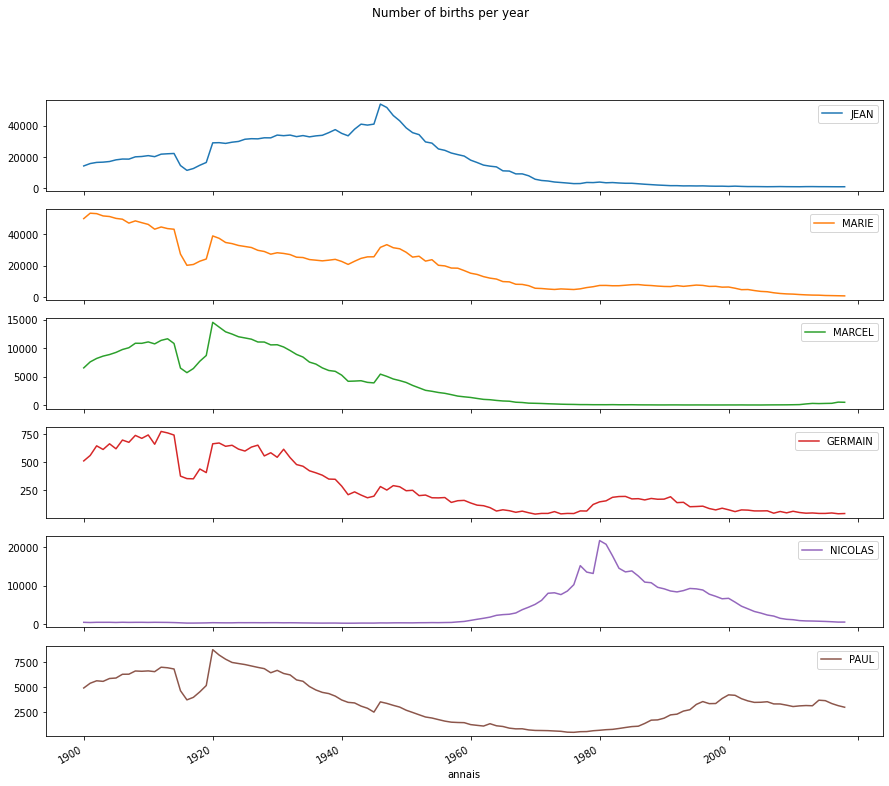

In [44]:
subset.plot(subplots=True,figsize=(15,13),grid=False,title="Number of births per year")

<AxesSubplot:title={'center':'Nb of births per year'}, xlabel='annais'>

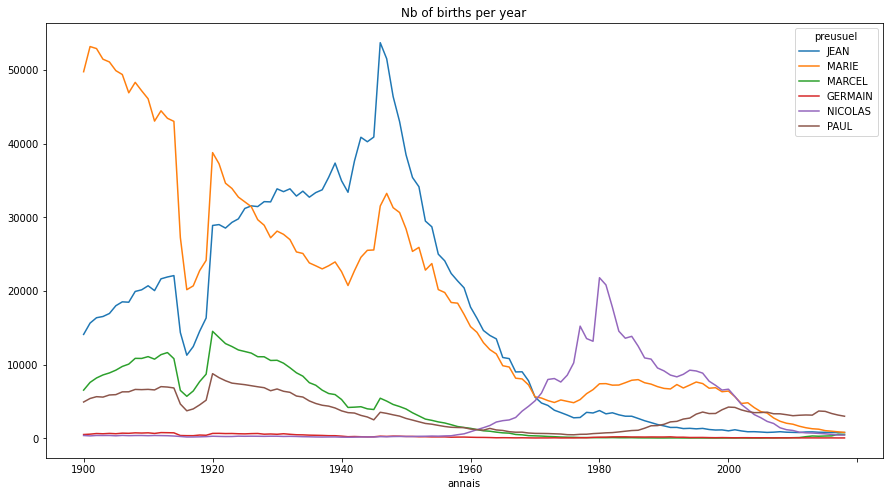

In [45]:
# Now let's remove subplots=True from the parameters list :
subset.plot(figsize=(15,8),grid=False,title="Nb of births per year")

# Measuring naming diversity

### exercice 1 : propose a way to compute diversity






There is many ways to tell a story about diversity : 
- total number of different firstnames per year
- how many firstnames we need ( sorted by decreasing popularity) to reach 50% of birth ?
- proportion of top1000 among total births for each year
- ... ?

## Method 1 : top 1000 total births among total births for each year and sex

In [156]:
table= top1000.pivot_table('prop', index='annais', columns='sexe', aggfunc=sum)

<AxesSubplot:title={'center':'top 1000 proportion among total births by year and sex'}, xlabel='annais'>

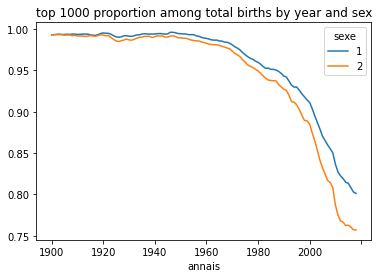

In [157]:
table.plot(title='top 1000 proportion among total births by year and sex')

### EXERCISE 2 :  
### Sanity check let's compute total births in 1900 / total births in the top 1000 of 1900
### And do the same for 2018


In [158]:

















# to see all years total :
nat.groupby('annais').nombre.sum()

annais
1900    415032
1901    453432
1902    465774
1903    468792
1904    478935
1905    489671
1906    501723
1907    501003
1908    525450
1909    526201
1910    535381
1911    514591
1912    545864
1913    547753
1914    538890
1915    351377
1916    282497
1917    306351
1918    348511
1919    385505
1920    648577
1921    636753
1922    610465
1923    616592
1924    620121
1925    638229
1926    640113
1927    633531
1928    638632
1929    629581
1930    657424
1931    650277
1932    643089
1933    609760
1934    613249
1935    584615
1936    578889
1937    570725
1938    565655
1939    566443
1940    514293
1941    486208
1942    535425
1943    577557
1944    584022
1945    591791
1946    866266
1947    892904
1948    892278
1949    894812
1950    884903
1951    849727
1952    847335
1953    830539
1954    837091
1955    833255
1956    834543
1957    844075
1958    840249
1959    857508
1960    849341
1961    867957
1962    863262
1963    899718
1964    908890
1965    897151
196

In [159]:


# 1900 total :


total1900=nat[nat.annais=='1900'].nombre.sum()
total1900



415032

In [160]:
# Just in case you'd need total sum : 
total_births=nat.nombre.sum()
total_births

84341356

In [110]:
# seems allright , around 700k births/y , 118yrs * 500k = 59M...

In [161]:
# Don't forget annais is not int..
total1900top1000=top1000[top1000.annais=="1900"].nombre.sum()
total1900top1000

412056

In [162]:
print (total1900top1000/total1900)

0.9928294685710981


In [163]:
# meaning that in 1900, the top1000 represents 99% of the total births
# Graph seems correct.

## Method 2 : Number of distinct names, in order of popularity, in the top 50% of births

In [168]:
# First let's make a boys only dataframe
# Since we are going to sort by prop, we should remove the prenoms rares 
# because they should appear at the end of the list, not at the beginning.
boys=nat[(nat.sexe==1) & (nat.preusuel!="_PRENOMS_RARES")]
boys

,sexe,preusuel,annais,nombre,prop
0,1,A,1980,3,0.000007
1,1,A,1998,3,0.000008
3,1,AADAM,2009,4,0.000010
4,1,AADAM,2014,3,0.000007
5,1,AADAM,2016,4,0.000010
6,1,AADAM,2017,4,0.000010
7,1,AADAM,2018,3,0.000008
9,1,AADEL,1976,5,0.000013
10,1,AADEL,1978,3,0.000008
11,1,AADEL,1980,3,0.000007


### Exercise 3 : verify that total number of boys lines = total number of line - total number of girls lines, only with code

In [169]:
print(boys.shape)
print(nat.shape)

(273864, 5)
(601461, 5)


In [170]:
boys2018=boys[boys.annais=='2018']
boys2018.sort_values(by='prop',ascending=False)

,sexe,preusuel,annais,nombre,prop
93421,1,GABRIEL,2018,5419,0.014335
225397,1,RAPHAËL,2018,4591,0.012145
171833,1,LÉO,2018,4446,0.011761
166342,1,LOUIS,2018,4415,0.011679
168595,1,LUCAS,2018,3979,0.010526
6868,1,ADAM,2018,3897,0.010309
28053,1,ARTHUR,2018,3755,0.009933
145785,1,JULES,2018,3698,0.009783
115265,1,HUGO,2018,3686,0.009751
186745,1,MAËL,2018,3259,0.008621


In [175]:
# We now want to know on what line we reach 50% of total births, so a total prop of 0,5.
# We can use the cumulative sum function : cumsum()
prop_cumsum=boys2018.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum

93421     0.014335
225397    0.026480
171833    0.038241
166342    0.049921
168595    0.060446
6868      0.070755
28053     0.080689
145785    0.090471
115265    0.100222
186745    0.108843
162429    0.117173
80114     0.125498
215198    0.133416
201857    0.141124
93287     0.148529
236671    0.155825
205915    0.162742
265754    0.169565
193655    0.176072
104       0.182022
263078    0.187868
208170    0.193510
271642    0.199113
181401    0.204711
183126    0.210266
265075    0.215811
206523    0.221310
77348     0.226786
68538     0.232170
31476     0.237439
23842     0.242442
171998    0.247388
180553    0.252277
230781    0.257089
269934    0.261594
53262     0.265834
34945     0.270030
263343    0.274212
225649    0.278395
240361    0.282537
19073     0.286643
30436     0.290703
202846    0.294690
185749    0.298616
185518    0.302414
94579     0.306179
72316     0.309893
13961     0.313538
120709    0.317168
183406    0.320723
            ...   
165777    0.930541
165016    0.

In [176]:
# To get the line when the prop reach 0.5 , let's use searchsorted() function
prop_cumsum.values.searchsorted(0.5)

132

In [177]:
# So we need the 133 first firstnames ( arrays starts at 0) of the list to reach 50% of births in 2018.
# let's do this for 1900 ( do it alone on your side)

boys1900=boys[boys.annais=='1900']
prop_cumsum1900 = boys1900.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum1900.values.searchsorted(0.5)+1




14

In [ ]:
# in 1900 , the top 14 firstnames represent 50% of the births !

Let's apply this operation to each year/sex combination

In [181]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False) 
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['annais', 'sexe']).apply(get_quantile_count)
diversity = diversity.unstack('sexe')
diversity.head()

sexe,1,2
annais,,
1900,14,14
1901,14,14
1902,14,14
1903,14,15
1904,14,15


<AxesSubplot:title={'center':'Number of firstnames to reach 50% of births'}, xlabel='annais'>

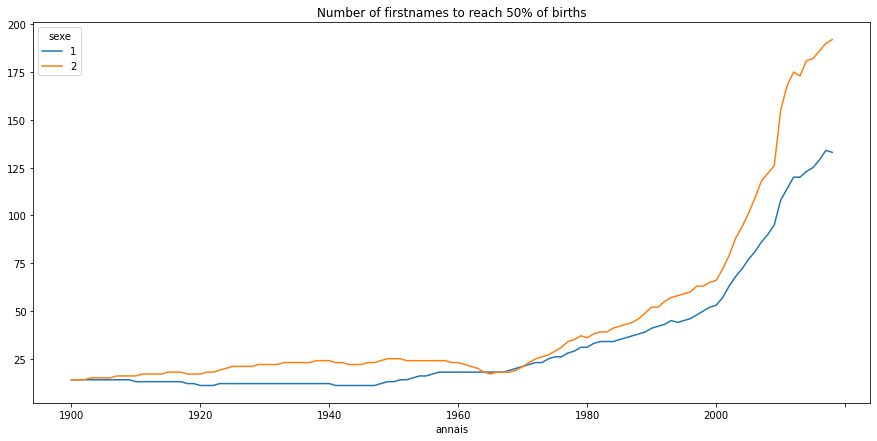

In [186]:
diversity.plot(title="Number of firstnames to reach 50% of births",figsize=(15,7))